In [43]:
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
df_node=pd.read_csv('large_twitch_features.csv')
df_edge=pd.read_csv('large_twitch_edges.csv')

In [45]:
df_node

,views,mature,life_time,created_at,updated_at,numeric_id,dead_account,language,affiliate
0,7879,1,969,2016-02-16,2018-10-12,0,0,EN,1
1,500,0,2699,2011-05-19,2018-10-08,1,0,EN,0
2,382502,1,3149,2010-02-27,2018-10-12,2,0,EN,1
3,386,0,1344,2015-01-26,2018-10-01,3,0,EN,0
4,2486,0,1784,2013-11-22,2018-10-11,4,0,EN,0
...,...,...,...,...,...,...,...,...,...
168109,4965,0,810,2016-07-20,2018-10-08,168109,0,EN,0
168110,4128,1,2080,2013-01-31,2018-10-12,168110,0,EN,0
168111,3545,0,1797,2013-11-08,2018-10-10,168111,0,EN,1
168112,892736,1,2135,2012-12-07,2018-10-12,168112,0,EN,0


In [46]:
#Basic information

df_node.info()

#Describe the data

df_node.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168114 entries, 0 to 168113
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   views         168114 non-null  int64 
 1   mature        168114 non-null  int64 
 2   life_time     168114 non-null  int64 
 3   created_at    168114 non-null  object
 4   updated_at    168114 non-null  object
 5   numeric_id    168114 non-null  int64 
 6   dead_account  168114 non-null  int64 
 7   language      168114 non-null  object
 8   affiliate     168114 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 11.5+ MB


,views,mature,life_time,numeric_id,dead_account,affiliate
count,1.681140e+05,168114.000000,168114.000000,168114.000000,168114.000000,168114.000000
mean,1.881618e+05,0.470116,1541.812116,84056.500000,0.030688,0.485064
std,3.326119e+06,0.499108,715.704133,48530.475915,0.172470,0.499778
min,0.000000e+00,0.000000,11.000000,0.000000,0.000000,0.000000
25%,1.415000e+03,0.000000,997.000000,42028.250000,0.000000,0.000000
50%,4.117000e+03,0.000000,1540.000000,84056.500000,0.000000,0.000000
75%,1.420800e+04,1.000000,2027.000000,126084.750000,0.000000,1.000000
max,3.843966e+08,1.000000,4161.000000,168113.000000,1.000000,1.000000


In [47]:
df_node.duplicated().sum()

0

In [48]:
df_node.isnull().sum()

views           0
mature          0
life_time       0
created_at      0
updated_at      0
numeric_id      0
dead_account    0
language        0
affiliate       0
dtype: int64

In [49]:
df_dead = df_node[df_node['dead_account'] == 1]

df_active = df_node[df_node['dead_account'] == 0]

In [52]:
# Time Series Analysis
df_node['Creation Date'] = pd.to_datetime(df_node['created_at'])
df_node['Last Update'] = pd.to_datetime(df_node['updated_at'])
df_node['Creation Month'] = df_node['Creation Date'].dt.month
df_node['Creation Year'] = df_node['Creation Date'].dt.year

df_node

,views,mature,life_time,created_at,updated_at,numeric_id,dead_account,language,affiliate,Creation Date,Last Update,Creation Month,Creation Year
0,7879,1,969,2016-02-16,2018-10-12,0,0,EN,1,2016-02-16,2018-10-12,2,2016
1,500,0,2699,2011-05-19,2018-10-08,1,0,EN,0,2011-05-19,2018-10-08,5,2011
2,382502,1,3149,2010-02-27,2018-10-12,2,0,EN,1,2010-02-27,2018-10-12,2,2010
3,386,0,1344,2015-01-26,2018-10-01,3,0,EN,0,2015-01-26,2018-10-01,1,2015
4,2486,0,1784,2013-11-22,2018-10-11,4,0,EN,0,2013-11-22,2018-10-11,11,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
168109,4965,0,810,2016-07-20,2018-10-08,168109,0,EN,0,2016-07-20,2018-10-08,7,2016
168110,4128,1,2080,2013-01-31,2018-10-12,168110,0,EN,0,2013-01-31,2018-10-12,1,2013
168111,3545,0,1797,2013-11-08,2018-10-10,168111,0,EN,1,2013-11-08,2018-10-10,11,2013
168112,892736,1,2135,2012-12-07,2018-10-12,168112,0,EN,0,2012-12-07,2018-10-12,12,2012


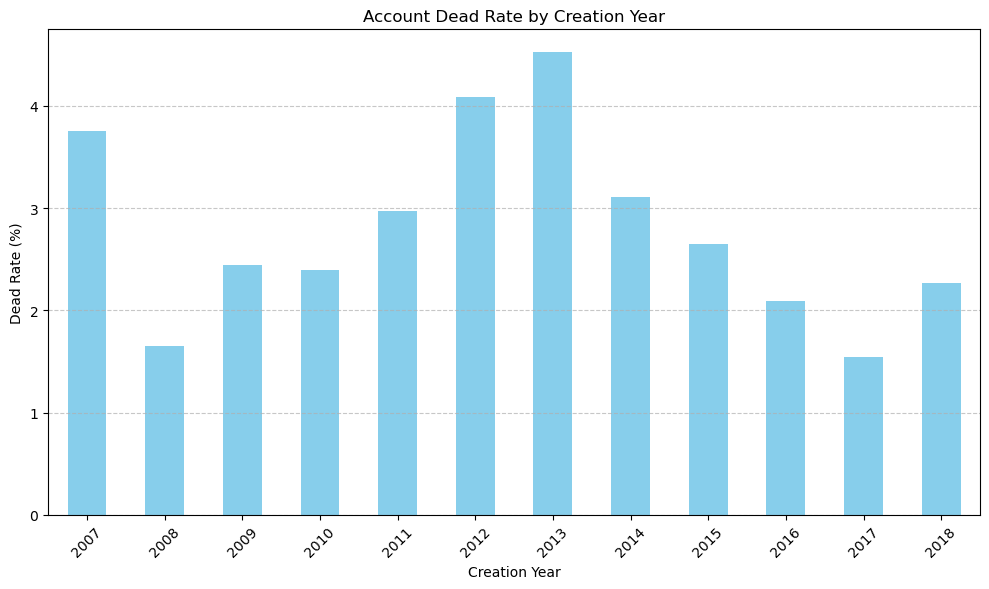

In [54]:
# Group the data by 'Creation Year' and calculate the dead rate for each year
dead_rate_by_year = df_node.groupby('Creation Year')['dead_account'].mean() * 100  # Convert to percentage

# Plot the dead rate for each creation year
plt.figure(figsize=(10, 6))
dead_rate_by_year.plot(kind='bar', color='skyblue')
plt.title('Account Dead Rate by Creation Year')
plt.xlabel('Creation Year')
plt.ylabel('Dead Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

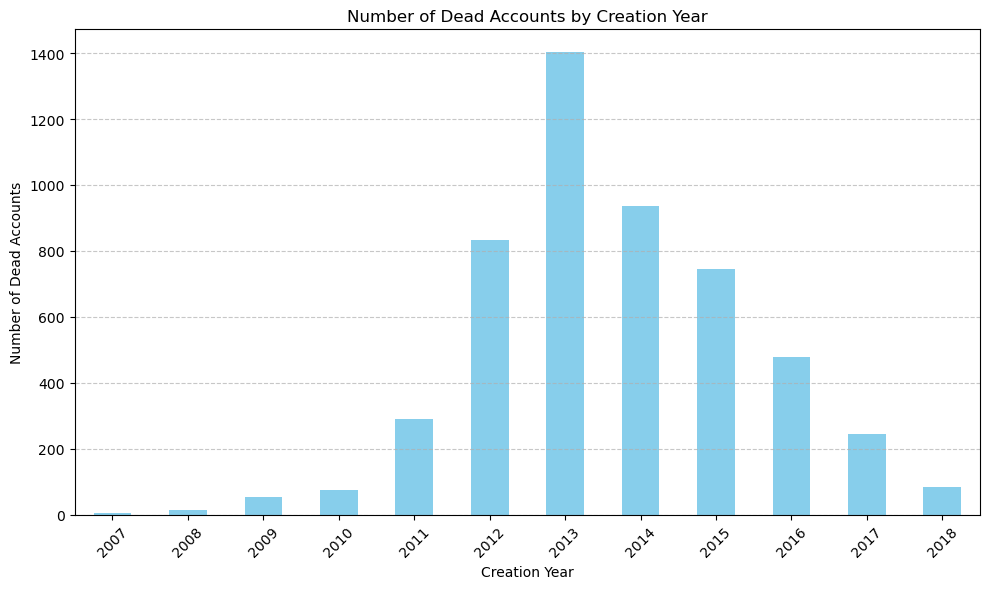

In [56]:
# Count the number of dead accounts for each creation year
dead_accounts_by_year = df_node[df_node['dead_account'] == 1].groupby('Creation Year').size()

# Plot the graph
plt.figure(figsize=(10, 6))
dead_accounts_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Dead Accounts by Creation Year')
plt.xlabel('Creation Year')
plt.ylabel('Number of Dead Accounts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

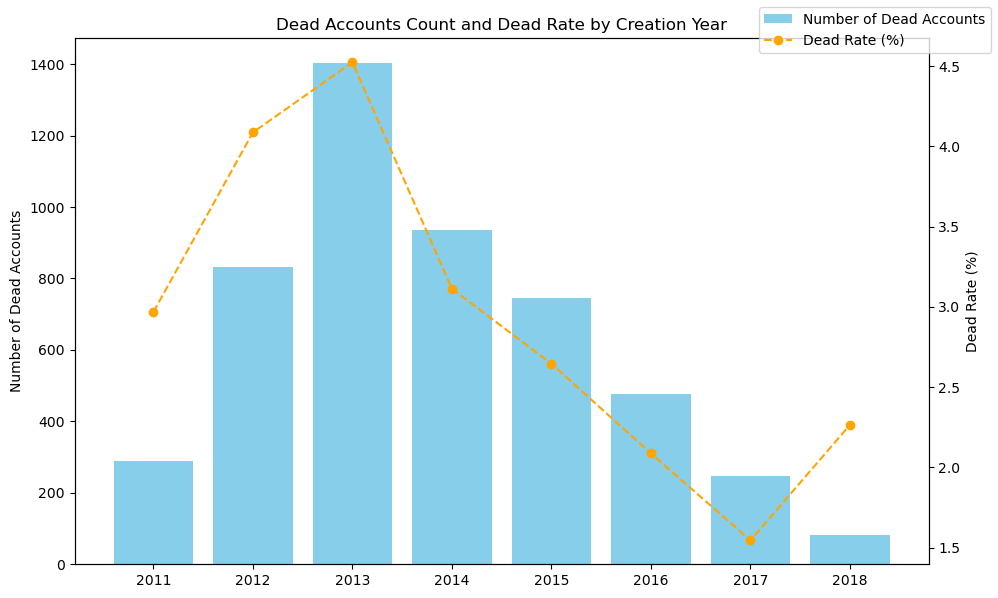

In [71]:

# Assuming you have the Series objects dead_accounts_by_year and dead_rate_by_year
# Convert Series to DataFrames with appropriate names
dead_accounts_by_year_df = dead_accounts_by_year.to_frame(name='Number of Dead Accounts')
dead_rate_by_year_df = dead_rate_by_year.to_frame(name='Dead Rate (%)')

# Merge the two DataFrames on 'Creation Year'
combined_df = pd.merge(dead_accounts_by_year_df, dead_rate_by_year_df, left_index=True, right_index=True)

filtered_df = combined_df[combined_df.index >= 2011]

# Plot the graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the number of dead accounts
ax1.bar(filtered_df.index, filtered_df['Number of Dead Accounts'], color='skyblue', label='Number of Dead Accounts')
ax1.set_ylabel('Number of Dead Accounts')

# Create a second y-axis for the dead rate
ax2 = ax1.twinx()
ax2.plot(filtered_df.index, filtered_df['Dead Rate (%)'], color='orange', linestyle='--', marker='o', label='Dead Rate (%)')
ax2.set_ylabel('Dead Rate (%)')

# Add title and legend
plt.title('Dead Accounts Count and Dead Rate by Creation Year')
fig.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

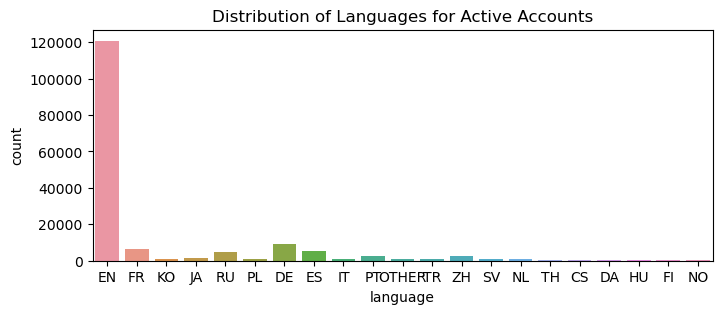

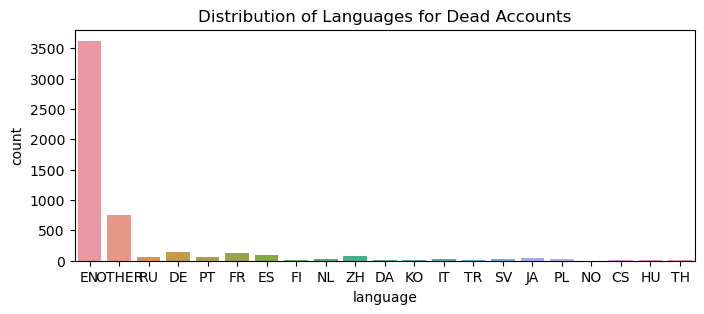

In [11]:
# Distribution of languages
plt.figure(figsize=(8, 3))
sns.countplot(df_active['language'])
plt.title('Distribution of Languages for Active Accounts')
plt.show()

plt.figure(figsize=(8, 3))
sns.countplot(df_dead['language'])
plt.title('Distribution of Languages for Dead Accounts')
plt.show()

In [111]:
df_node_cluster.groupby('language').size()  # Convert to percentage

df_node_cluster.groupby('language')['dead_account'].mean() * 100  # Convert to percentage


language
CS        1.388889
DA        1.789264
DE        1.474332
EN        2.911318
ES        1.702053
FI        1.380368
FR        1.912046
HU        1.873536
IT        1.707317
JA        3.014318
KO        0.740741
NL        3.851641
NO        0.909091
OTHER    52.694192
PL        3.072034
PT        2.641956
RU        1.410496
SV        3.044496
TH        0.791139
TR        0.906736
ZH        2.899576
Name: dead_account, dtype: float64

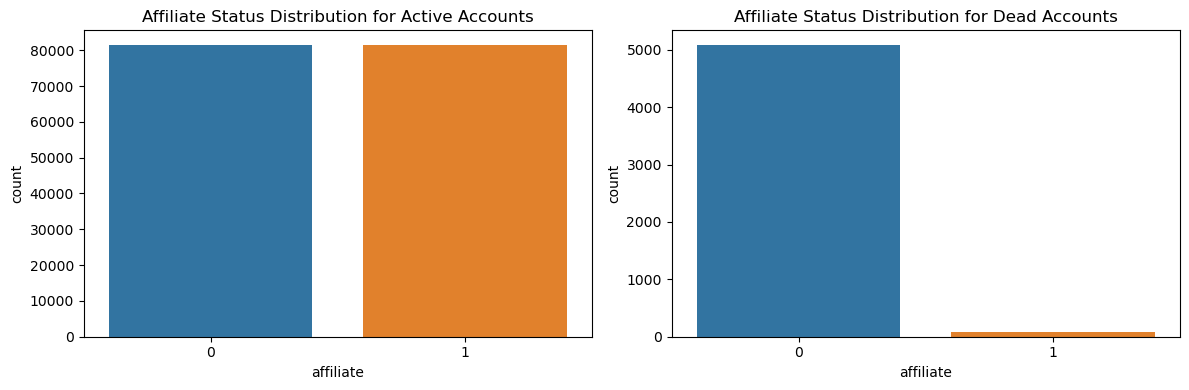

In [13]:
# Create subplots with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first countplot for active accounts
sns.countplot(df_active['affiliate'], ax=axes[0])
axes[0].set_title('Affiliate Status Distribution for Active Accounts')

# Plot the second countplot for dead accounts
sns.countplot(df_dead['affiliate'], ax=axes[1])
axes[1].set_title('Affiliate Status Distribution for Dead Accounts')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

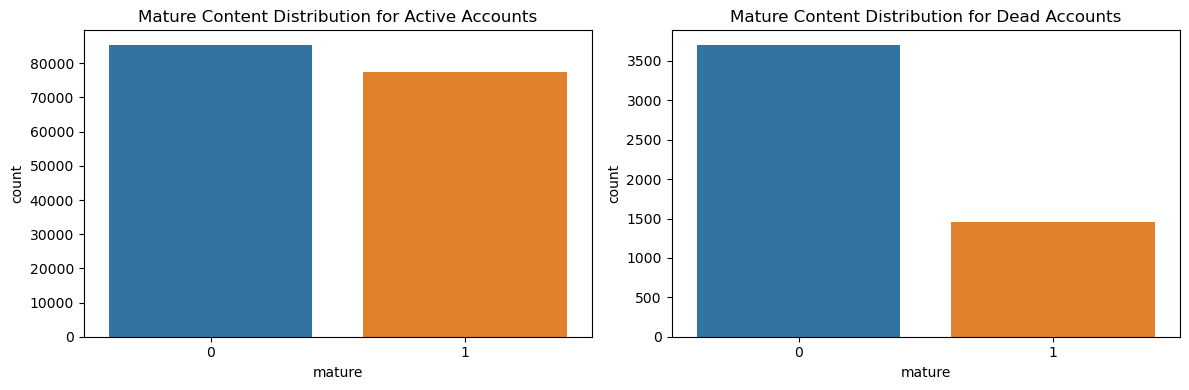

In [15]:
# Create subplots with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first countplot for active accounts
sns.countplot(df_active['mature'], ax=axes[0])
axes[0].set_title('Mature Content Distribution for Active Accounts')

# Plot the second countplot for dead accounts
sns.countplot(df_dead['mature'], ax=axes[1])
axes[1].set_title('Mature Content Distribution for Dead Accounts')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

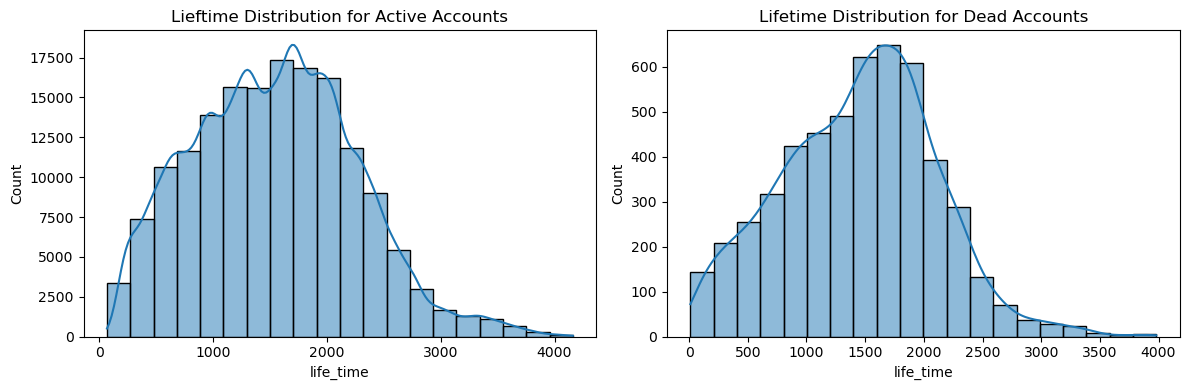

In [17]:
# Distribution of account life time

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first countplot for active accounts
sns.histplot(df_active['life_time'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Lieftime Distribution for Active Accounts')

# Plot the second countplot for dead accounts
sns.histplot(df_dead['life_time'],  bins=20, kde=True, ax=axes[1])
axes[1].set_title('Lifetime Distribution for Dead Accounts')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

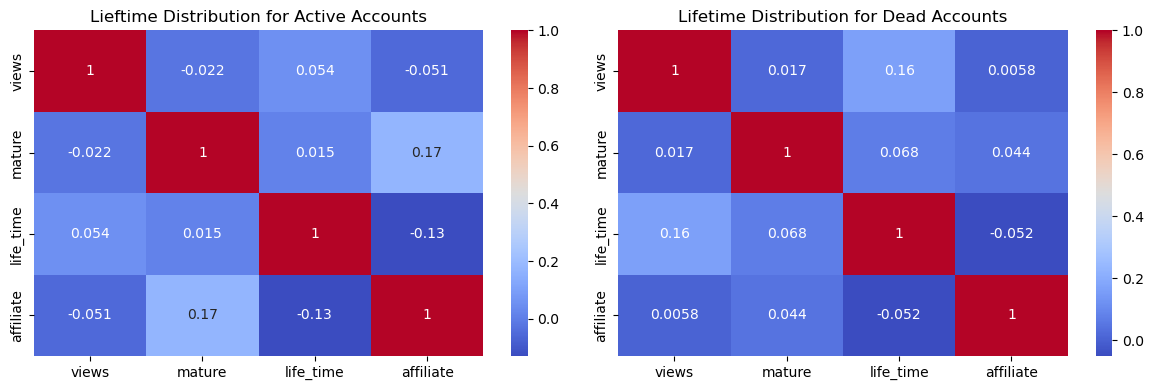

In [27]:
# Distribution of account life time

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first countplot for active accounts
sns.heatmap(df_active[['views', 'mature', 'life_time', 'affiliate']].corr(), annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Lieftime Distribution for Active Accounts')

# Plot the second countplot for dead accounts
sns.heatmap(df_dead[['views', 'mature', 'life_time', 'affiliate']].corr(), annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Lifetime Distribution for Dead Accounts')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

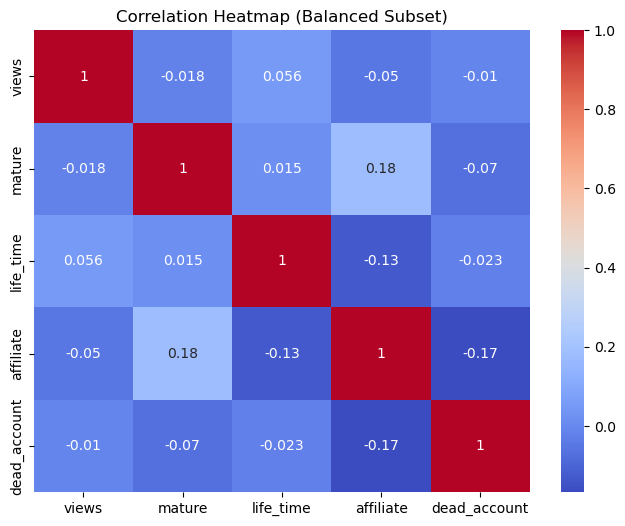

In [114]:
## stratified sampling

from sklearn.model_selection import train_test_split

X = df_node.drop(columns=['dead_account'])  # Features
y = df_node['dead_account']  # Target variable

# Perform stratified sampling to create a balanced subset
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Concatenate X_train and y_train to create a balanced subset DataFrame
balanced_df = pd.concat([X_train, y_train], axis=1)

# Compute the correlation matrix
correlation_matrix = balanced_df[['views', 'mature', 'life_time', 'affiliate','dead_account']].corr() 

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Balanced Subset)')
plt.show()

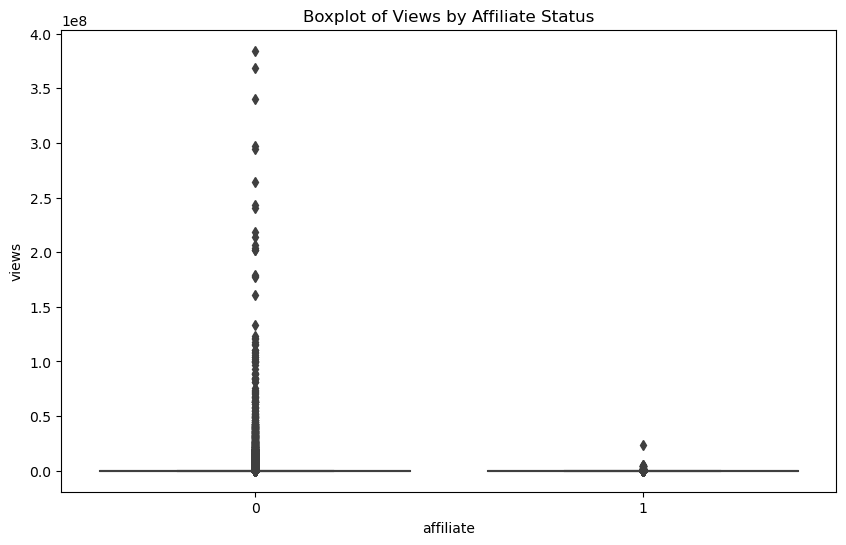

In [29]:
# Boxplots
plt.figure(figsize=(5, 3))
sns.boxplot(x='affiliate', y='views', data=df_node)
plt.title('Boxplot of Views by Affiliate Status')
plt.show()

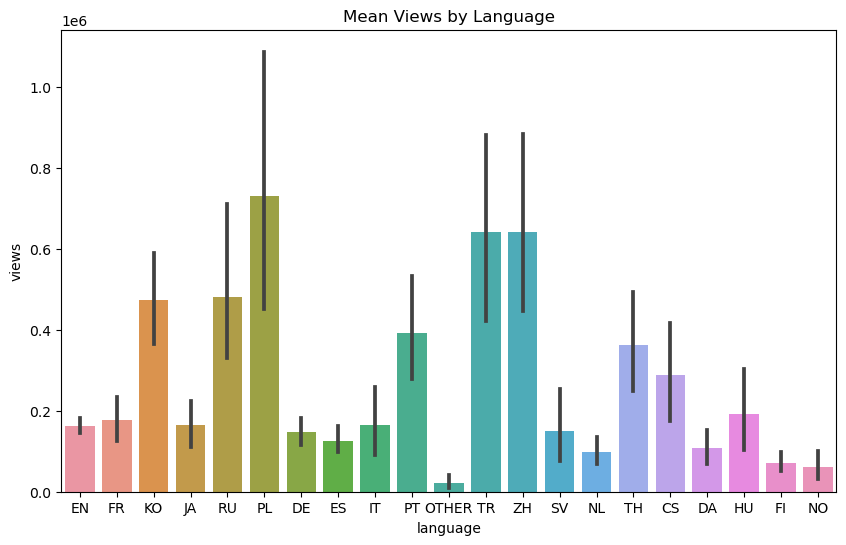

In [34]:
# Barplots
plt.figure(figsize=(10, 6))
sns.barplot(x='language', y='views', data=df_node)
plt.title('Mean Views by Language')
plt.show()

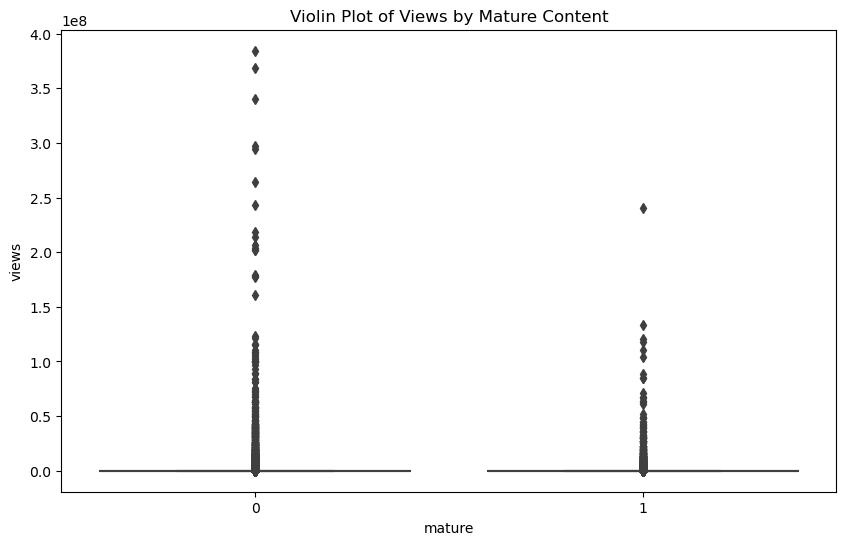

In [36]:
# Violin Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='mature', y='views', data=df_node)
plt.title('Violin Plot of Views by Mature Content')
plt.show()

In [26]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


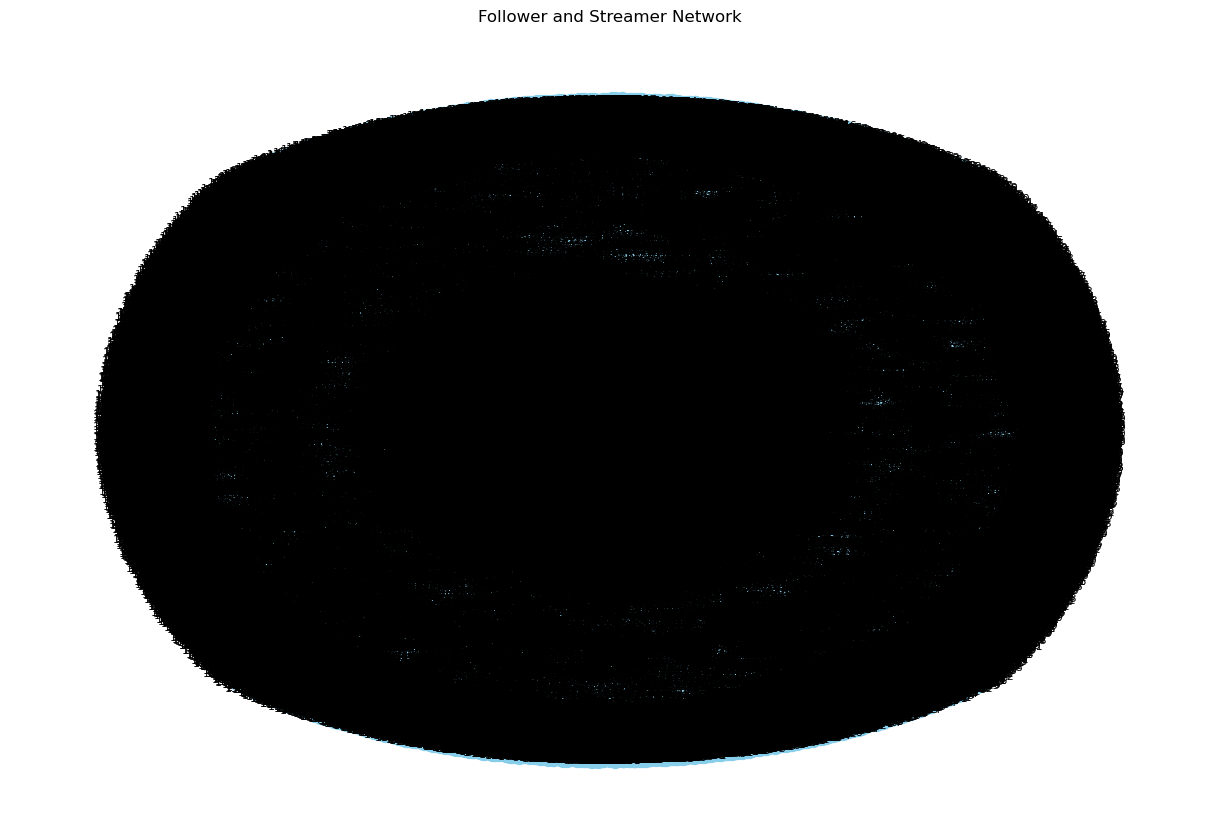

In [7]:

# Load the dataset
edges_data = pd.read_csv("large_twitch_edges.csv")

# Create a directed graph
G = nx.from_pandas_edgelist(edges_data, source='numeric_id_1', target='numeric_id_2', create_using=nx.DiGraph())

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=100, node_color='skyblue', font_size=8, edge_color='gray', arrows=False)
plt.title('Follower and Streamer Network')
plt.show()

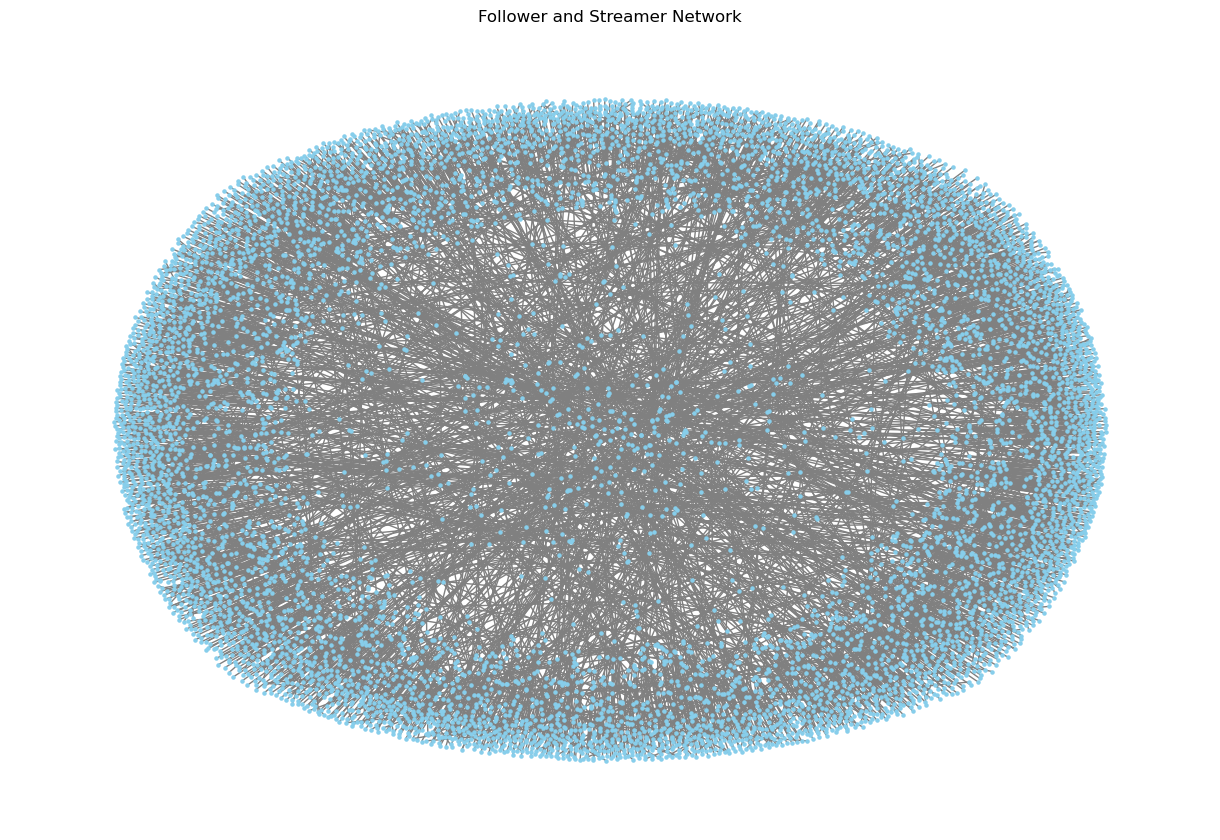

In [31]:
# Take a random sample of edges
sampled_edges = edges_data.sample(n=5000)  # Adjust the sample size as needed

# Create a directed graph
G = nx.from_pandas_edgelist(sampled_edges, source='numeric_id_1', target='numeric_id_2', create_using=nx.DiGraph())

# Plot the graph
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=False, node_size=5, arrowsize=1, node_color='skyblue', font_size=8, edge_color='gray', arrows=False)
plt.title('Follower and Streamer Network')
plt.show()

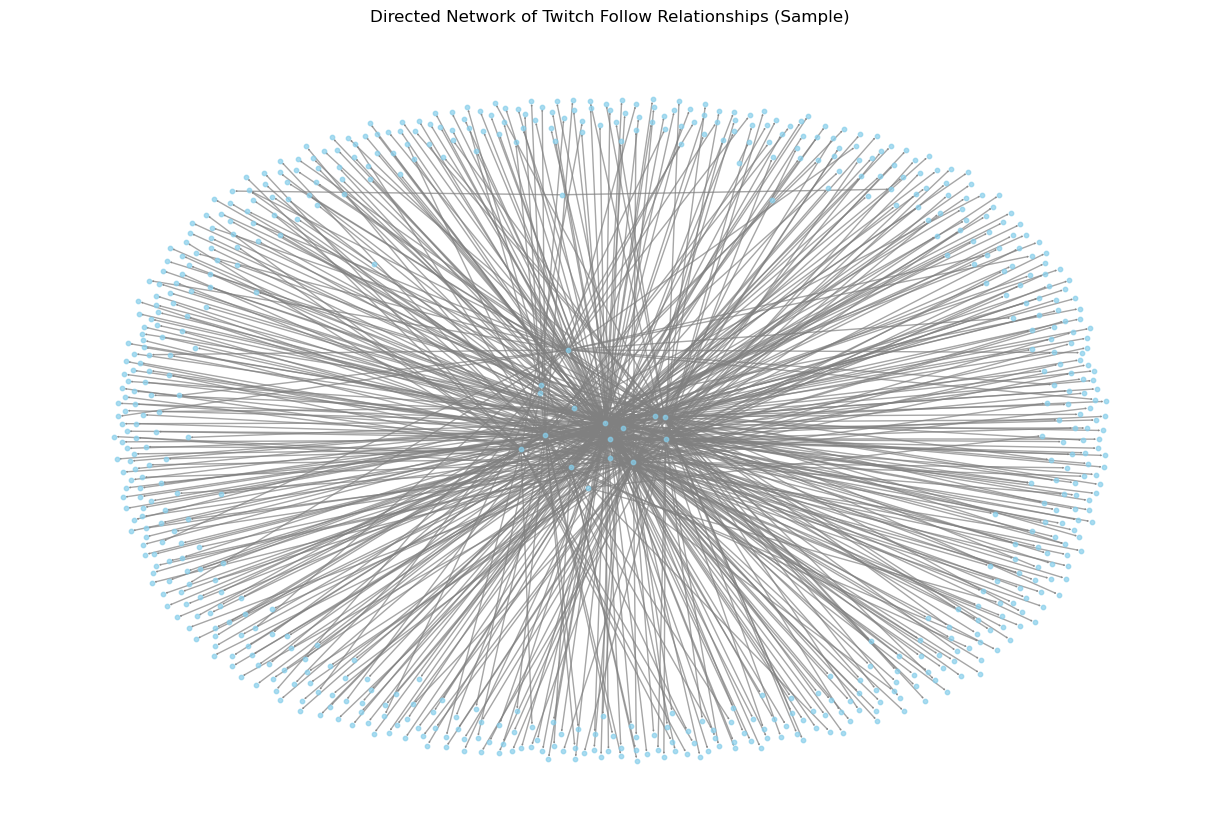

In [30]:
import random

# Randomly select 500 unique source nodes
source_nodes_sample = random.sample(edges_data['numeric_id_1'].unique().tolist(), 20)

# Extract edges corresponding to the selected source nodes
sampled_edges = edges_data[edges_data['numeric_id_1'].isin(source_nodes_sample)]

# Create a directed graph
G = nx.from_pandas_edgelist(sampled_edges, source='numeric_id_1', target='numeric_id_2', create_using=nx.DiGraph())

# Visualize the directed network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Positions nodes using the spring layout algorithm
nx.draw(G, pos, with_labels=False, node_size=10, node_color='skyblue', arrowsize=1, alpha=0.7, edge_color='gray')
plt.title('Directed Network of Twitch Follow Relationships (Sample)')
plt.show()

## attributes for clusters

In [77]:
df_cluster=pd.read_csv('nodes.csv')
df_cluster_cleaned = df_cluster.dropna(subset=['tin'])
df_cluster_cleaned

,tin,Label,modularity_class
1,98343.0,NaN,2.0
3,141493.0,NaN,2.0
5,58736.0,NaN,2.0
7,140703.0,NaN,2.0
9,151401.0,NaN,2.0
...,...,...,...
336219,131422.0,NaN,0.0
336221,102494.0,NaN,2.0
336223,157597.0,NaN,0.0
336225,128281.0,NaN,2.0


In [78]:
print(df_cluster_cleaned.groupby('modularity_class').size())


modularity_class
0.0       5532
1.0        427
2.0     109511
3.0       1113
4.0       4783
5.0       1880
6.0       4472
7.0       8467
8.0        701
9.0      24717
10.0      5993
11.0       518
dtype: int64


In [80]:
# Merge the two DataFrames on the common column 'tin'/'numeric_id'
df_node_cluster = pd.merge(df_node, df_cluster_cleaned, left_on='numeric_id', right_on='tin', how='inner')

# Drop the duplicate 'tin' column, if needed
df_node_cluster.drop('tin', axis=1, inplace=True)

# Print the combined DataFrame
df_node_cluster

,views,mature,life_time,created_at,updated_at,numeric_id,dead_account,language,affiliate,Creation Date,Last Update,Creation Month,Creation Year,Label,modularity_class
0,7879,1,969,2016-02-16,2018-10-12,0,0,EN,1,2016-02-16,2018-10-12,2,2016,NaN,2.0
1,500,0,2699,2011-05-19,2018-10-08,1,0,EN,0,2011-05-19,2018-10-08,5,2011,NaN,2.0
2,382502,1,3149,2010-02-27,2018-10-12,2,0,EN,1,2010-02-27,2018-10-12,2,2010,NaN,2.0
3,386,0,1344,2015-01-26,2018-10-01,3,0,EN,0,2015-01-26,2018-10-01,1,2015,NaN,2.0
4,2486,0,1784,2013-11-22,2018-10-11,4,0,EN,0,2013-11-22,2018-10-11,11,2013,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168109,4965,0,810,2016-07-20,2018-10-08,168109,0,EN,0,2016-07-20,2018-10-08,7,2016,NaN,2.0
168110,4128,1,2080,2013-01-31,2018-10-12,168110,0,EN,0,2013-01-31,2018-10-12,1,2013,NaN,2.0
168111,3545,0,1797,2013-11-08,2018-10-10,168111,0,EN,1,2013-11-08,2018-10-10,11,2013,NaN,2.0
168112,892736,1,2135,2012-12-07,2018-10-12,168112,0,EN,0,2012-12-07,2018-10-12,12,2012,NaN,2.0


In [84]:
df_churn_summary_1 = df_node_cluster.groupby('modularity_class').size()  # Convert to percentage

df_churn_summary_2 = df_node_cluster.groupby('modularity_class')['dead_account'].mean() * 100  # Convert to percentage

df_churn_summary_1 
df_churn_summary_2

modularity_class
0.0     2.187274
1.0     0.936768
2.0     3.265425
3.0     1.976640
4.0     1.421702
5.0     1.542553
6.0     1.542934
7.0     1.417267
8.0     0.855920
9.0     4.110531
10.0    2.002336
11.0    1.544402
Name: dead_account, dtype: float64

In [85]:
# Concatenate the two DataFrames along the columns (axis=1)
combined_summary = pd.concat([df_churn_summary_1, df_churn_summary_2], axis=1)

# Rename the columns for clarity
combined_summary.columns = ['Node Count', 'Dead Account Rate (%)']

# Print the combined summary table
print(combined_summary)

                  Node Count  Dead Account Rate (%)
modularity_class                                   
0.0                     5532               2.187274
1.0                      427               0.936768
2.0                   109511               3.265425
3.0                     1113               1.976640
4.0                     4783               1.421702
5.0                     1880               1.542553
6.0                     4472               1.542934
7.0                     8467               1.417267
8.0                      701               0.855920
9.0                    24717               4.110531
10.0                    5993               2.002336
11.0                     518               1.544402


In [91]:
## EDA for Group 9 with highest churn rate 
df_node_cluster9 =  df_node_cluster[df_node_cluster['modularity_class'] == 9]


In [107]:
## EDA for Group 1/7/8 with lowest churn rate 
df_node_cluster8 =  df_node_cluster[df_node_cluster['modularity_class'] == 8]
df_node_cluster7 =  df_node_cluster[df_node_cluster['modularity_class'] == 7]
df_node_cluster1 =  df_node_cluster[df_node_cluster['modularity_class'] == 1]


In [93]:
# Summary statistics for each cluster
summary_stats_cluster8 = df_node_cluster8.describe()
summary_stats_cluster9 = df_node_cluster9.describe()

              views      mature    life_time     numeric_id  dead_account  \
count  7.010000e+02  701.000000   701.000000     701.000000    701.000000   
mean   7.041637e+05    0.233951  1190.386591   82672.718973      0.008559   
std    3.655036e+06    0.423644   645.909078   49054.852853      0.092185   
min    4.900000e+01    0.000000   155.000000     415.000000      0.000000   
25%    4.212000e+03    0.000000   629.000000   42464.000000      0.000000   
50%    1.494800e+04    0.000000  1145.000000   80310.000000      0.000000   
75%    9.496600e+04    0.000000  1654.000000  125063.000000      0.000000   
max    4.286333e+07    1.000000  3819.000000  167969.000000      1.000000   

        affiliate  Creation Month  Creation Year  Label  modularity_class  
count  701.000000      701.000000     701.000000    0.0             701.0  
mean     0.594864        6.415121    2015.014265    NaN               8.0  
std      0.491269        3.534362       1.791192    NaN               0.0  
mi

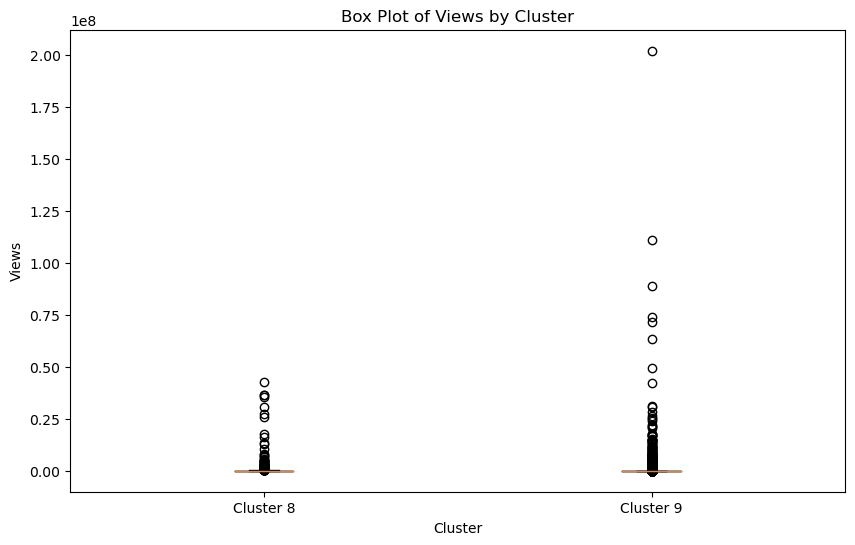

In [97]:
# Box plot of views by cluster
plt.figure(figsize=(10, 6))
plt.boxplot([df_node_cluster8['views'], df_node_cluster9['views']], labels=['Cluster 8', 'Cluster 9'])
plt.xlabel('Cluster')
plt.ylabel('Views')
plt.title('Box Plot of Views by Cluster')
plt.show()

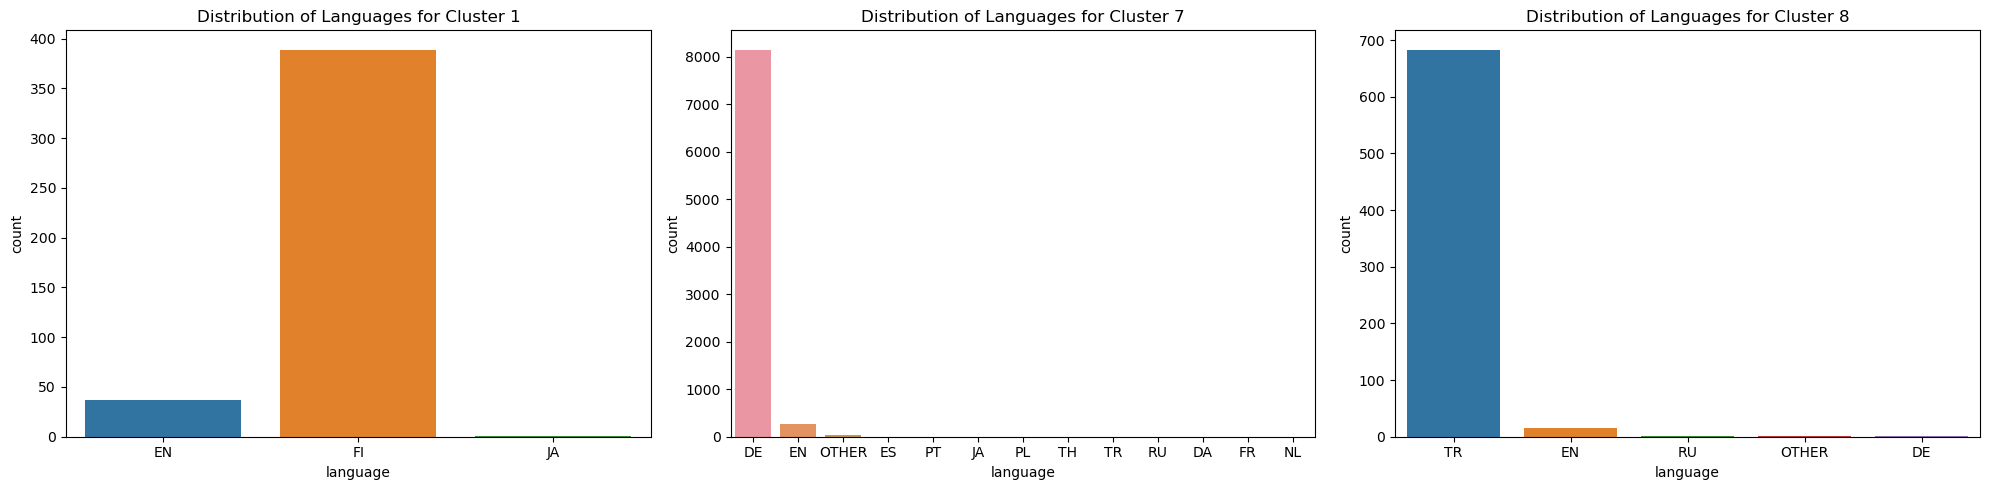

In [110]:
# Bar plot of language distribution by cluster
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Distribution of languages for Cluster 1
sns.countplot(df_node_cluster1['language'], ax=axes[0])
axes[0].set_title('Distribution of Languages for Cluster 1')

# Distribution of languages for Cluster 7
sns.countplot(df_node_cluster7['language'], ax=axes[1])
axes[1].set_title('Distribution of Languages for Cluster 7')

# Distribution of languages for Cluster 8
sns.countplot(df_node_cluster8['language'], ax=axes[2])
axes[2].set_title('Distribution of Languages for Cluster 8')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


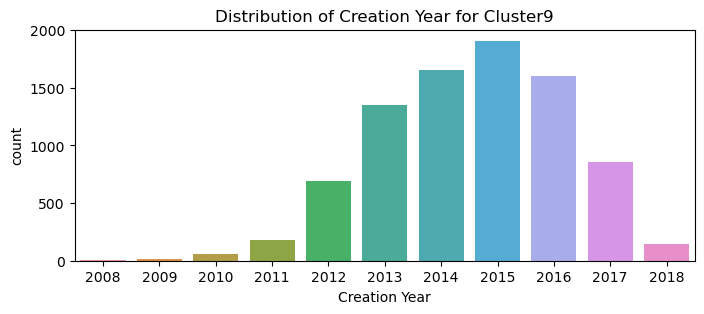

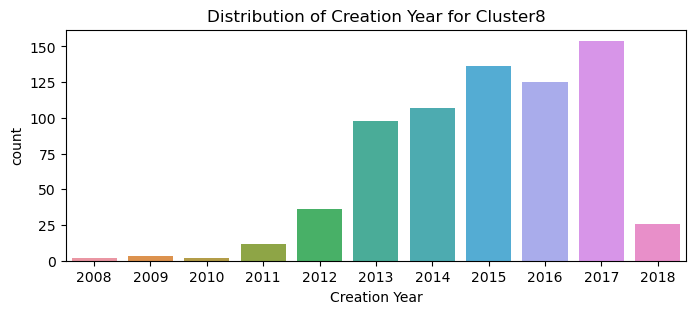

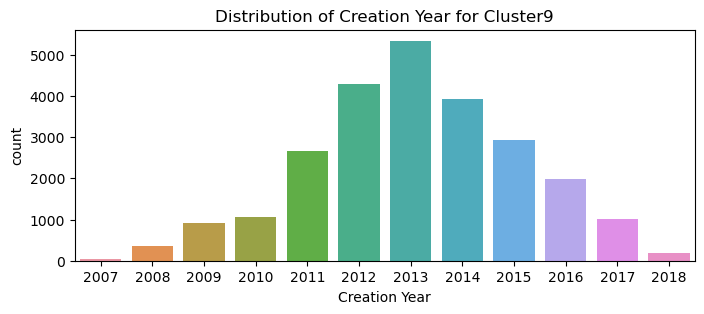

In [106]:
# Distribution of languages
plt.figure(figsize=(8, 3))
sns.countplot(df_node_cluster1['Creation Year'])
plt.title('Distribution of Creation Year for Cluster9')
plt.show()

plt.figure(figsize=(8, 3))
sns.countplot(df_node_cluster7['Creation Year'])
plt.title('Distribution of Creation Year for Cluster9')
plt.show()

plt.figure(figsize=(8, 3))
sns.countplot(df_node_cluster8['Creation Year'])
plt.title('Distribution of Creation Year for Cluster8')
plt.show()

plt.figure(figsize=(8, 3))
sns.countplot(df_node_cluster9['Creation Year'])
plt.title('Distribution of Creation Year for Cluster9')
plt.show()
